[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Kos261/ML25/blob/main/Lab1/Assignment1.ipynb)

# **Homework Assignment: Principal Component Analysis (PCA) on 3D Clustered Data**

-------------------------------

You are provided with a dataset containing 3-dimensional data points from three distinct classes. The dataset can be downloaded from the following link:

**[PCA Three Clusters Dataset](https://github.com/SzymonNowakowski/Machine-Learning-2024/blob/master/PCA_three_clusters_data.csv)**

Each data point is represented by three continuous features $(x, y, z)$ and belongs to one of three clusters.

## **Primary Question**

**Perform PCA on the provided dataset to find the two principal components and visualize the data in a 2D plot using these components.**

- Compare this PCA plot with the following 2D plots of the original data:
  - $x$ vs. $y$
  - $x$ vs. $z$
  - $y$ vs. $z$

**Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.**



## **Secondary Question**

Remember: before applying PCA, **standardize** the data so that each feature has a mean of 0 and a variance of 1.

**Why is standardization necessary before applying PCA?**

- Reflect on how differences in scale among features can impact the principal component directions.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Performs PCA on the dataset and visualizes the first two principal components in a 2D scatter plot.
     - Includes separate 2D scatter plots for the original feature pairs: $(x, y)$, $(x, z)$, and $(y, z)$.
     - Clearly **answers** both the **primary** and **secondary** questions.
     - Uses Python code to perform PCA, standardize the data, and generate the required plots.
   - To answer the primary question, you may consider creating additional visualizations or charts beyond those listed above. For example, some students might choose to explore a 3D plot of the data. Feel free to experiment with different approaches.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and include an **“Open in Colab”** badge in your notebook, so it can be launched directly from GitHub.






In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Data from csv
data = np.loadtxt("PCA_three_clusters_data.csv",delimiter=",", skiprows=1)
X = data[:, :3]
Y = data[:, 3] 

In [100]:
#Standarize, axis=0 -> with respect to columns
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
U, Sigma, VT = np.linalg.svd(X, full_matrices=False)

variance_estimators = (Sigma ** 2) / (X.shape[0] - 1)
explained_variance_ratio = variance_estimators / variance_estimators.sum()
print(f"Explained Variance Ratios: {explained_variance_ratio}")
# One variance should dominate? Maybe data is synthetic?

# XV = U @ Sigma_full
XV = U[:, :X.shape[1]] * Sigma


Explained Variance Ratios: [0.34722276 0.33441835 0.31835889]


In [101]:
#Check the correctness of my solution
from sklearn.decomposition import PCA
pca = PCA()
X_sklearn = pca.fit_transform(X)
absolute_diff = np.abs(X_sklearn) - np.abs(XV)
print("Max absolute difference:", np.max(np.abs(absolute_diff)))

Max absolute difference: 1.715294573045867e-14


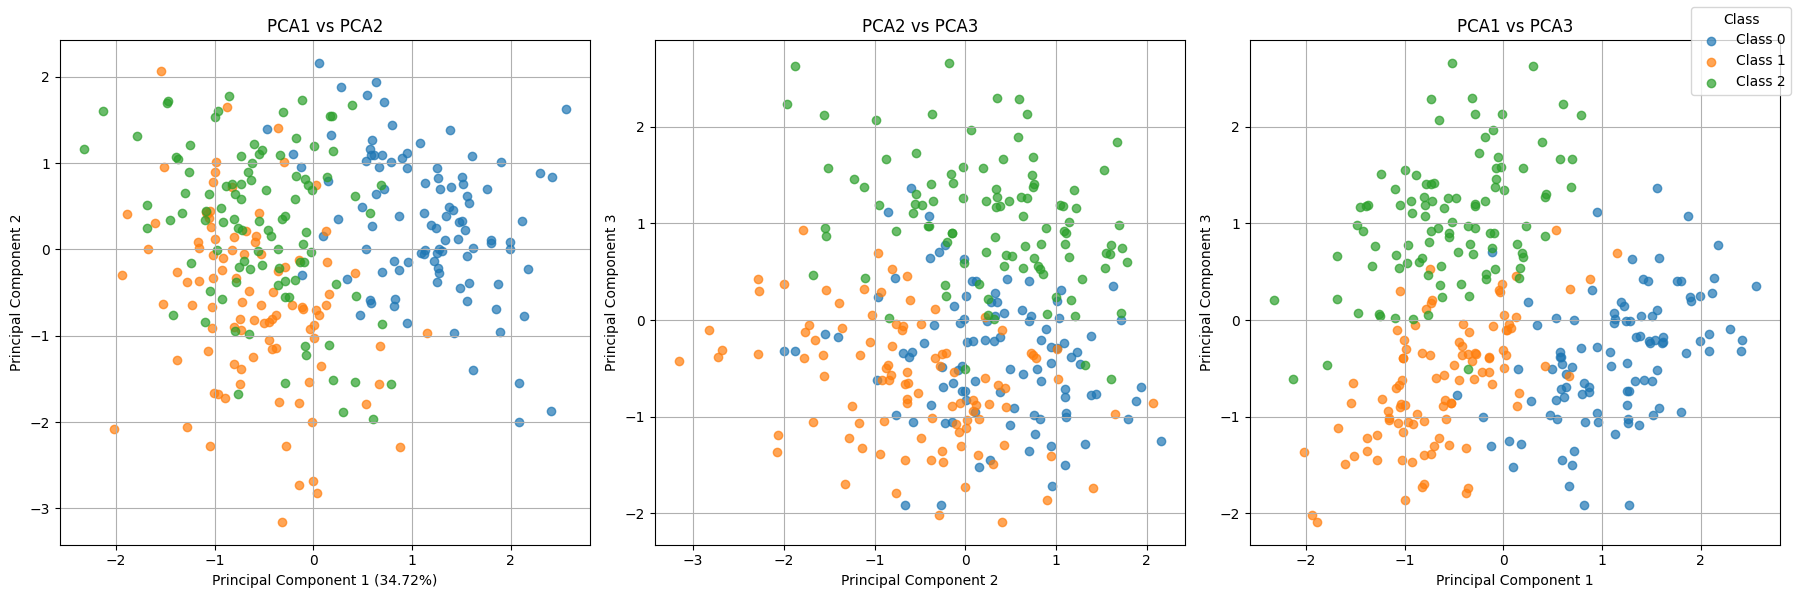

In [102]:
# Plot
unique_targets = np.unique(Y)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for target in unique_targets:
    axs[0].scatter(XV[Y == target, 0], XV[Y == target, 1], 
                   label=f"Class {int(target)}", alpha=0.7)
axs[0].set_xlabel(f"Principal Component 1 ({explained_variance_ratio[0]:.2%})")
axs[0].set_ylabel("Principal Component 2")
axs[0].set_title("PCA1 vs PCA2")
axs[0].grid(True)

for target in unique_targets:
    axs[1].scatter(XV[Y == target, 1], XV[Y == target, 2], 
                   label=f"Class {int(target)}", alpha=0.7)
axs[1].set_xlabel("Principal Component 2")
axs[1].set_ylabel("Principal Component 3")
axs[1].set_title("PCA2 vs PCA3")
axs[1].grid(True)

for target in unique_targets:
    axs[2].scatter(XV[Y == target, 0], XV[Y == target, 2], 
                   label=f"Class {int(target)}", alpha=0.7)
axs[2].set_xlabel("Principal Component 1")
axs[2].set_ylabel("Principal Component 3")
axs[2].set_title("PCA1 vs PCA3")
axs[2].grid(True)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title="Class")

plt.tight_layout()
plt.show()

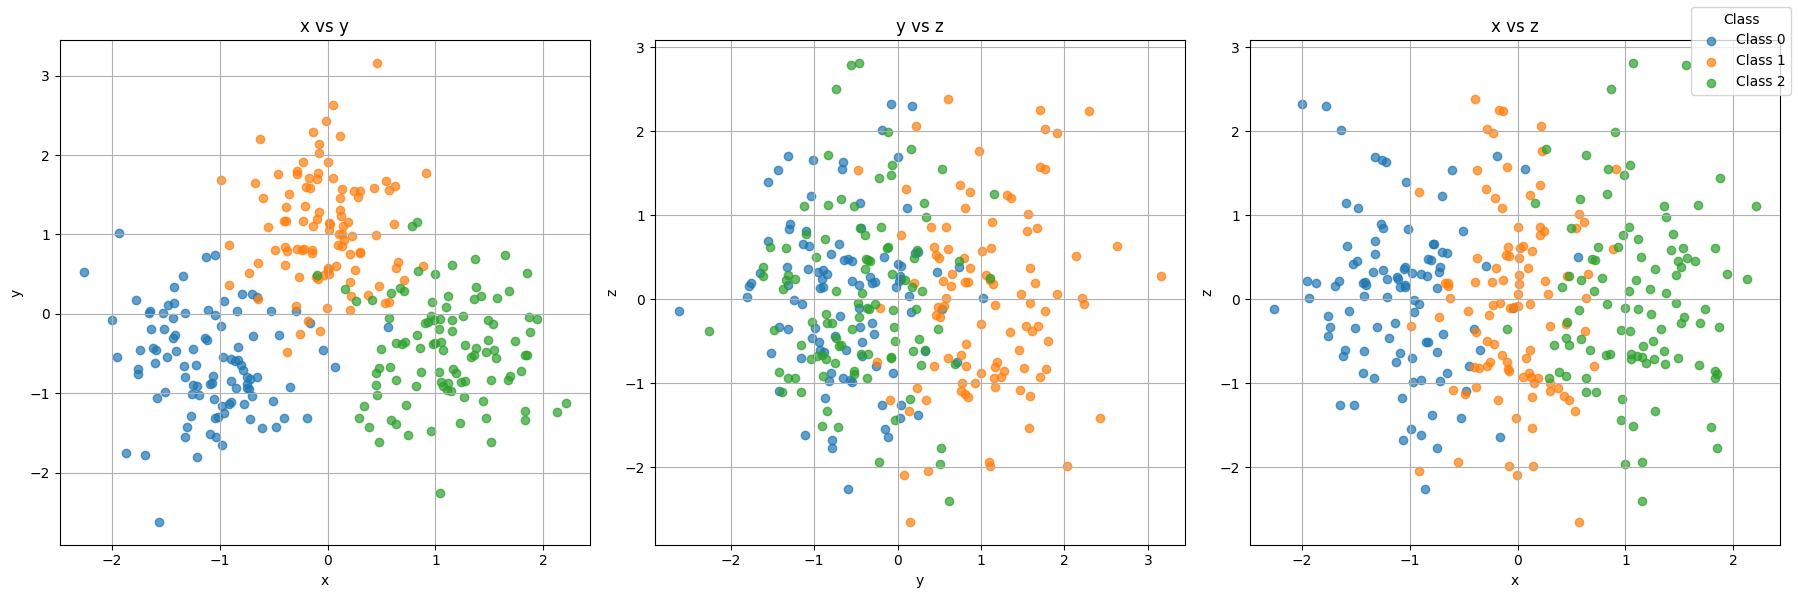

In [103]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
for target in unique_targets:
    axs[0].scatter(X[Y == target, 0], X[Y == target, 1], label=f"Class {int(target)}", alpha=0.7)
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("y")
    axs[0].set_title("x vs y")
    axs[0].grid(True)

for target in unique_targets:
    axs[1].scatter(X[Y == target, 1], X[Y == target, 2], label=f"Class {int(target)}", alpha=0.7)
    axs[1].set_xlabel("y")
    axs[1].set_ylabel("z")
    axs[1].set_title("y vs z")
    axs[1].grid(True)

for target in unique_targets:
    axs[2].scatter(X[Y == target, 0], X[Y == target, 2], label=f"Class {int(target)}", alpha=0.7)
    axs[2].set_xlabel("x")
    axs[2].set_ylabel("z")
    axs[2].set_title("x vs z")
    axs[2].grid(True)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title="Class")

plt.tight_layout()
plt.show()

# **ANSWER 1**
PCA does look worse than original data because its optimising variance and not separation between classes. If best separation is with respect to z axis but at the same time it's not the best variance then PCA will ignore z axis. 



# **ANSWER 2**
Standarized data is necessary if we want equally treated features. For example if we use different scales, variance can differ. Without standarization features with large range will dominate smaller ones. The principal components shows relationship between features rather than units of measurement 
